In [1]:
import pandas as pd
import numpy as np
import os
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 
import warnings
warnings.simplefilter("ignore")

In [2]:
Train_Beneficiarydata=pd.read_csv("most rated/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("most rated/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("most rated/Train_Outpatientdata-1542865627584.csv")
Train=pd.read_csv("most rated/Train-1542865627584.csv")

In [3]:
print(Train_Beneficiarydata.columns,f'\nTotal values: {len(Train_Beneficiarydata)}')

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object') 
Total values: 138556


In [4]:
print(Train_Inpatientdata.columns,f'\nTotal values: {len(Train_Inpatientdata)}')

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object') 
Total values: 40474


In [5]:
print(Train_Outpatientdata.columns,f'\nTotal values: {len(Train_Outpatientdata)}')

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object') 
Total values: 517737


In [6]:
print(Train.columns,f'\nTotal values: {len(Train)}')

Index(['Provider', 'PotentialFraud'], dtype='object') 
Total values: 5410


### Feature Engineering

In [7]:
TODAY = pd.to_datetime("2020-12-31")
Train_Beneficiarydata["DOB"] = pd.to_datetime(Train_Beneficiarydata["DOB"])
Train_Beneficiarydata["DOD"] = pd.to_datetime(Train_Beneficiarydata["DOD"], errors='coerce')
Train_Beneficiarydata["Age"] = (
    (Train_Beneficiarydata["DOD"].fillna(TODAY) - Train_Beneficiarydata["DOB"])
    .dt.days//365 
)

Train_Inpatientdata["ClaimStartDt"]= pd.to_datetime(Train_Inpatientdata["ClaimStartDt"])
Train_Inpatientdata["ClaimEndDt"]= pd.to_datetime(Train_Inpatientdata["ClaimEndDt"])
Train_Inpatientdata["ClaimPeriod"] = (
    (Train_Inpatientdata["ClaimEndDt"] - Train_Inpatientdata["ClaimStartDt"])
    .dt.days
)
Train_Inpatientdata["AdmissionPeriod"] = (
    (Train_Inpatientdata["ClaimEndDt"] - Train_Inpatientdata["ClaimStartDt"])
    .dt.days
)

Train_Outpatientdata["ClaimStartDt"]= pd.to_datetime(Train_Outpatientdata["ClaimStartDt"])
Train_Outpatientdata["ClaimEndDt"]= pd.to_datetime(Train_Outpatientdata["ClaimEndDt"])
Train_Outpatientdata["ClaimPeriod"] = (
    (Train_Outpatientdata["ClaimEndDt"] - Train_Outpatientdata["ClaimStartDt"])
    .dt.days
)


Train_Beneficiarydata=Train_Beneficiarydata.drop(columns=['DOB','DOD'])
Train_Inpatientdata=Train_Inpatientdata.drop(columns=['ClaimStartDt','ClaimEndDt','DischargeDt','AdmissionDt'])
Train_Outpatientdata=Train_Outpatientdata.drop(columns=['ClaimStartDt','ClaimEndDt'])

In [8]:
Train_Inpatientdata.isnull().sum()

BeneID                        0
ClaimID                       0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
ClaimPeriod                   0
AdmissionPeriod               0
dtype: int64

In [9]:
Train_Outpatientdata.isnull().sum()

BeneID                         0
ClaimID                        0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
ClaimPeriod                    0
dtype: int64

In [10]:
number_cols = [f'ClmProcedureCode_{i}' for i in range(1, 7)]
target_cols = number_cols + ['DeductibleAmtPaid']
print(target_cols)

['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid']


In [11]:
Train_Inpatientdata[target_cols] = Train_Inpatientdata[target_cols].fillna(0)
Train_Outpatientdata[target_cols]= Train_Outpatientdata[target_cols].fillna(0)

In [12]:
object_cols = [f'ClmDiagnosisCode_{i}' for i in range(1, 11)] +['AttendingPhysician','OperatingPhysician','OtherPhysician']
Train_Inpatientdata[object_cols] = Train_Inpatientdata[object_cols].fillna('0')
Train_Outpatientdata[object_cols + ['ClmAdmitDiagnosisCode']]= Train_Outpatientdata[object_cols + ['ClmAdmitDiagnosisCode']].fillna('0')

In [13]:
print("Beneficiary Data:",Train_Beneficiarydata.dtypes)
print("\nInpatient Data:",Train_Inpatientdata.dtypes)
print("\nOutpatient Data:",Train_Outpatientdata.dtypes)

Beneficiary Data: BeneID                             object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt            int64
OPAnnualDeductibleAmt               int64
Age             

In [14]:
InpatientData_merged = Train_Inpatientdata.merge(Train_Beneficiarydata, on='BeneID', how='left')
print(f"{len(InpatientData_merged):,}")

40,474


In [15]:
InpatientData_merged.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimPeriod,AdmissionPeriod,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,0,0,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,0,0.0,0.0,0.0,0.0,0.0,0.0,6,6,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,78
1,BENE11001,CLM66048,PRV55907,5000,PHY318495,PHY318495,0,6186,1068.0,750,6186,2948,56400,0,0,0,0,0,0,0,7092.0,0.0,0.0,0.0,0.0,0.0,2,2,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,78
2,BENE11001,CLM68358,PRV56046,5000,PHY372395,0,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,78
3,BENE11011,CLM38412,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,0,331.0,0.0,0.0,0.0,0.0,0.0,8,8,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320,106
4,BENE11014,CLM63689,PRV56614,10000,PHY379376,PHY398258,0,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,0,3893.0,0.0,0.0,0.0,0.0,0.0,17,17,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100,82


In [16]:
OutpatientData_merged = Train_Outpatientdata.merge(Train_Beneficiarydata ,on='BeneID', how='left')
print(f"{len(OutpatientData_merged):,}")

517,737


In [17]:
OutpatientData_merged.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,ClaimPeriod,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11002,CLM624349,PRV56011,30,PHY326117,0,0,78943,V5866,V1272,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,56409,0,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,84
1,BENE11003,CLM189947,PRV57610,80,PHY362868,0,0,6115,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,79380,0,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,84
2,BENE11003,CLM438021,PRV57595,10,PHY328821,0,0,2723,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,84
3,BENE11004,CLM121801,PRV56011,40,PHY334319,0,0,71988,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,98
4,BENE11004,CLM150998,PRV56011,200,PHY403831,0,0,82382,30000,72887,4280,7197,V4577,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,71947,0,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,98


In [54]:
def unique_value_distribution(df):
    print("Unique value count per column:\n")
    for col in df.columns:
        unique_vals = df[col].nunique()
        print(f"{col}: {unique_vals} unique values and Dtype: {df[col].dtype}")

In [19]:
unique_value_distribution(InpatientData_merged)
unique_value_distribution(OutpatientData_merged)

Unique value count per column:

BeneID: 31289 unique values
ClaimID: 40474 unique values
Provider: 2092 unique values
InscClaimAmtReimbursed: 146 unique values
AttendingPhysician: 11605 unique values
OperatingPhysician: 8288 unique values
OtherPhysician: 2878 unique values
ClmAdmitDiagnosisCode: 1928 unique values
DeductibleAmtPaid: 2 unique values
DiagnosisGroupCode: 736 unique values
ClmDiagnosisCode_1: 2254 unique values
ClmDiagnosisCode_2: 2440 unique values
ClmDiagnosisCode_3: 2428 unique values
ClmDiagnosisCode_4: 2442 unique values
ClmDiagnosisCode_5: 2375 unique values
ClmDiagnosisCode_6: 2359 unique values
ClmDiagnosisCode_7: 2311 unique values
ClmDiagnosisCode_8: 2244 unique values
ClmDiagnosisCode_9: 2095 unique values
ClmDiagnosisCode_10: 953 unique values
ClmProcedureCode_1: 1118 unique values
ClmProcedureCode_2: 298 unique values
ClmProcedureCode_3: 155 unique values
ClmProcedureCode_4: 49 unique values
ClmProcedureCode_5: 7 unique values
ClmProcedureCode_6: 1 unique valu

In [20]:
from IPython.display import HTML, display

def make_df_sticky(df):
    """
    Renders a pandas DataFrame as HTML with a sticky index column.
    """
    html = df.to_html()
    css = """
    <style>
        .dataframe {
            border-collapse: collapse;
        }
        .dataframe th:first-child, .dataframe td:first-child {
            position: sticky;
            left: 0;
            background-color: white; 
            z-index: 10;
            border-right: 1px solid #e0e0e0; 
        }
    </style>
    """
    display(HTML(css + html))

In [21]:
make_df_sticky(InpatientData_merged.describe())

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimPeriod,AdmissionPeriod,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.0,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000,40474.000000
mean,10087.884074,1044.277808,3371.262366,552.991748,100.766739,11.665267,1.171740,0.0,5.660251,5.660251,1.574863,1.248752,25.392573,377.385136,11.915402,11.922642,1.495948,1.278179,1.398231,1.809038,1.520853,1.497776,1.197954,1.143302,1.648441,1.639645,1.830163,17528.645056,1887.461234,1897.183130,529.319390,84.614641
std,10303.099402,157.394952,3718.180908,1586.759059,734.744727,242.171204,87.754729,0.0,5.628873,5.628873,0.494370,0.698123,15.235985,266.417759,0.987961,0.879923,0.499990,0.448107,0.489540,0.393064,0.499571,0.500001,0.398462,0.350385,0.477463,0.480109,0.375495,17562.156402,1686.848629,3949.299161,948.130843,13.204292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,0.000000,37.000000
25%,4000.000000,1068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,1.000000,1.000000,11.000000,150.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,6000.000000,1068.000000,190.000000,40.000000,79.000000
50%,7000.000000,1068.000000,3322.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.000000,4.000000,2.000000,1.000000,25.000000,342.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,12000.000000,1068.000000,730.000000,210.000000,86.000000
75%,12000.000000,1068.000000,7817.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.000000,7.000000,2.000000,1.000000,38.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,22000.000000,2136.000000,2020.000000,610.000000,94.000000
max,125000.000000,1068.000000,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,0.0,36.000000,36.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,112.000000


In [22]:
make_df_sticky(OutpatientData_merged.describe())

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClaimPeriod,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
count,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.0,517737.0,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000,517737.000000
mean,286.334799,1.913889,0.313128,0.022861,0.015744,0.0,0.0,2.779233,1.420532,1.579149,1.255500,25.451221,378.682244,11.932728,11.940031,1.606120,1.419844,1.602833,1.851708,1.700064,1.570463,1.302161,1.248352,1.685004,1.692674,1.903605,4266.368446,465.667318,2308.013258,659.109380,84.248253
std,694.034343,122.157934,42.823805,9.368375,10.904427,0.0,0.0,15.785839,4.707387,0.493696,0.718923,15.189408,265.121345,0.881558,0.778058,0.488609,0.493534,0.489312,0.355389,0.458230,0.495010,0.459195,0.432057,0.464515,0.461386,0.295132,10626.011381,1063.078487,3874.948920,1005.505705,13.029054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,0.000000,0.000000,36.000000
25%,40.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,1.000000,11.000000,150.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,490.000000,130.000000,79.000000
50%,80.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.000000,1.000000,24.000000,350.000000,12.000000,12.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1200.000000,350.000000,85.000000
75%,200.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.000000,1.000000,38.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4000.000000,1068.000000,2630.000000,800.000000,93.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,0.0,0.0,897.000000,23.000000,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000,112.000000


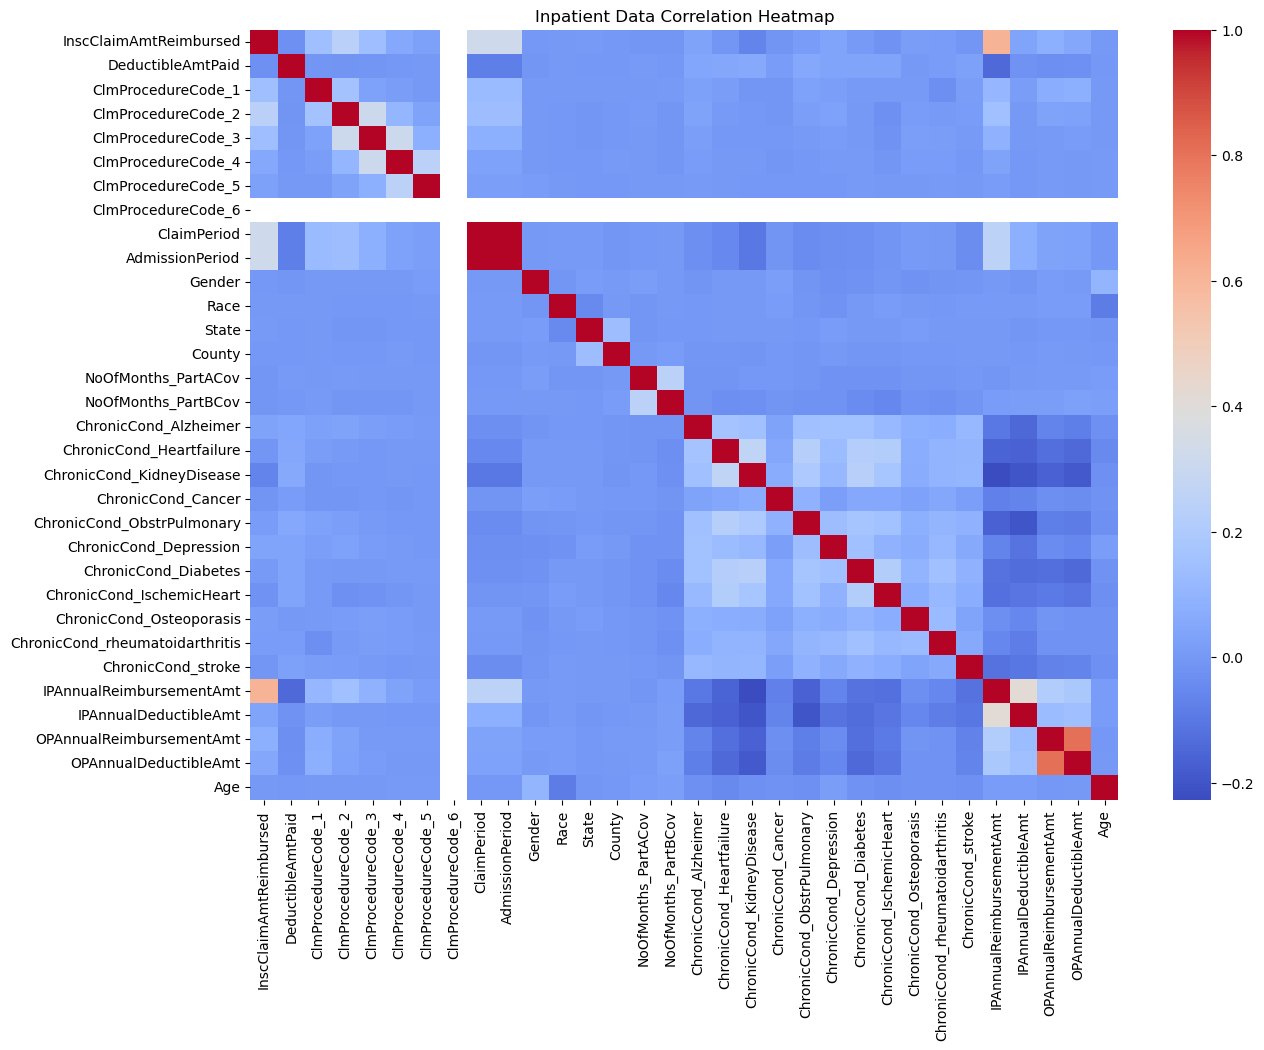

In [23]:
numeric_cols_inp = InpatientData_merged.select_dtypes(include='number')
numeric_cols_out = OutpatientData_merged.select_dtypes(include='number')

plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols_inp.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Inpatient Data Correlation Heatmap")
plt.show()

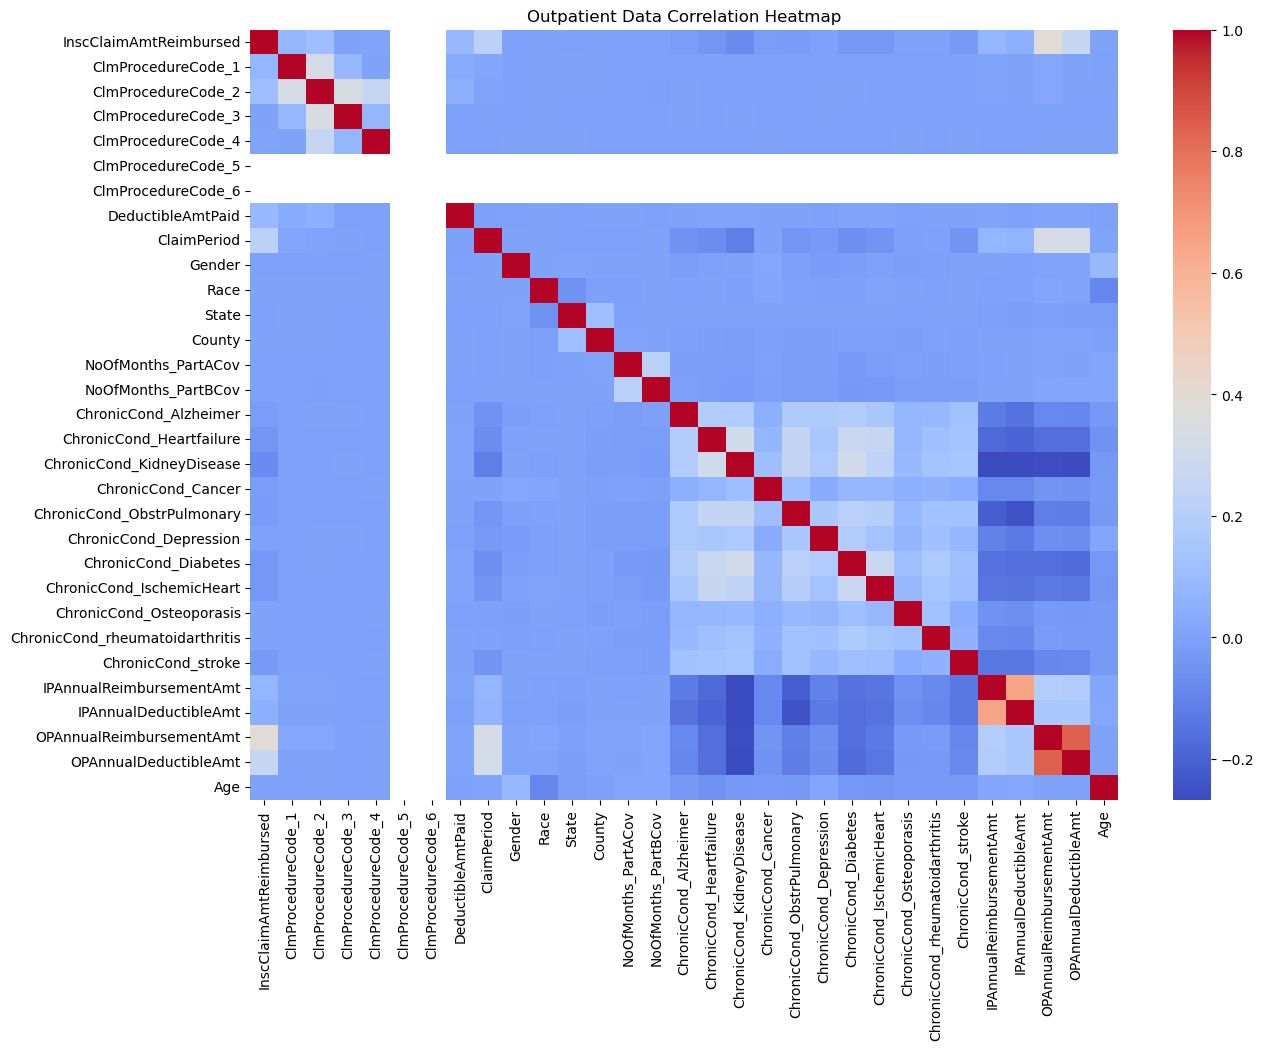

In [24]:
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols_out.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Outpatient Data Correlation Heatmap")
plt.show()

In [25]:
# InpatientData_merged=InpatientData_merged.drop(columns=['AdmissionPeriod'])

In [26]:
def plot_distributions(df):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    sns.histplot(data=df, x='Age', ax=axes[0])
    axes[0].set_title("Age Distribution")
    sns.histplot(data=df, x='ClaimPeriod', bins=30,ax=axes[1])
    axes[1].set_title("Claim Period Distribution")
    plt.tight_layout()
    plt.show()

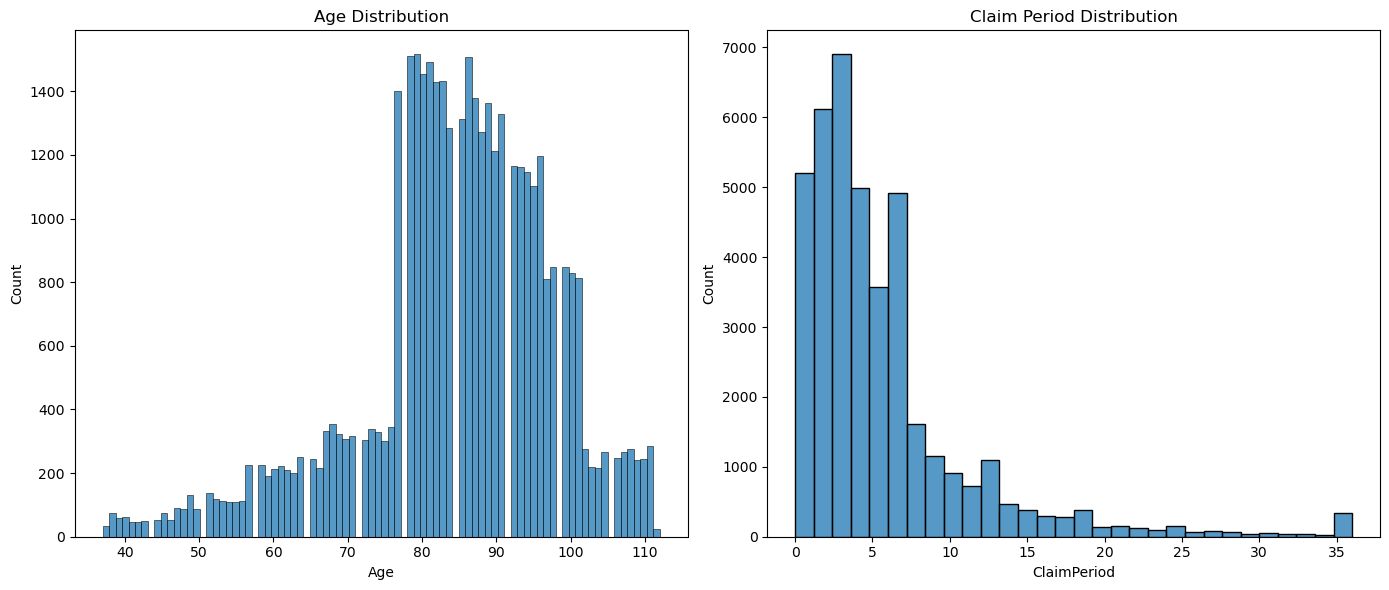

In [27]:
plot_distributions(InpatientData_merged)

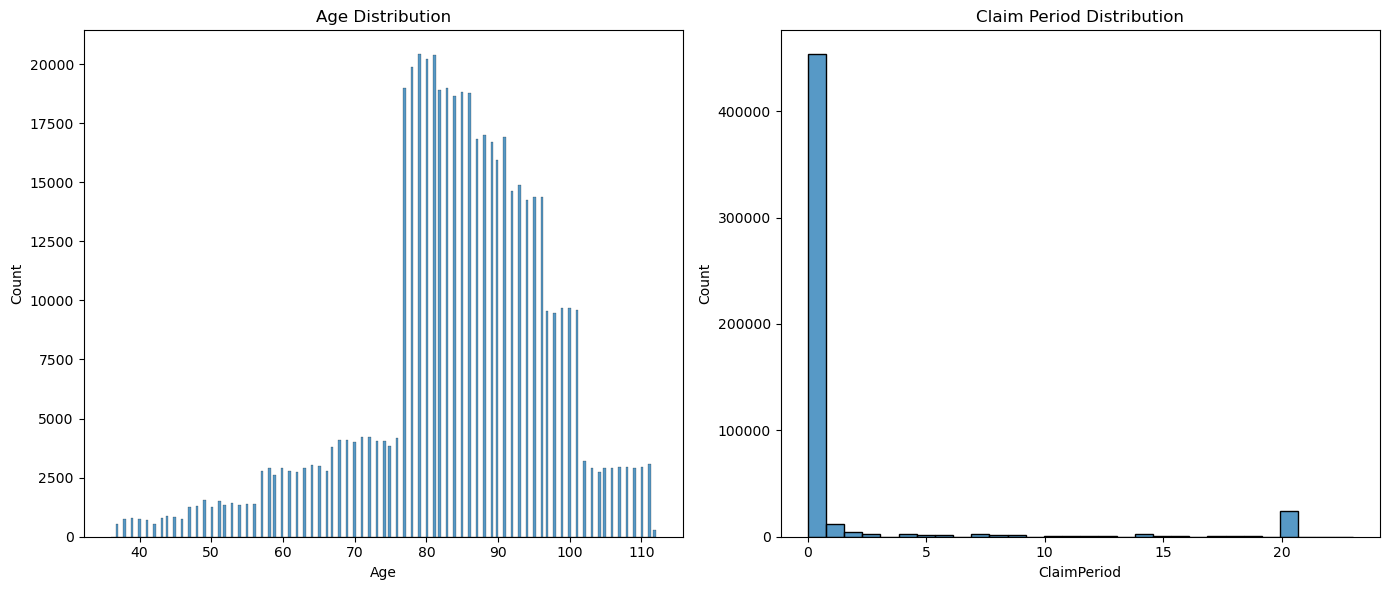

In [28]:
plot_distributions(OutpatientData_merged)

In [29]:
InpatientData_merged['Type']="Inpatient"
OutpatientData_merged['Type']="Outpatient"

In [30]:
InpatientData_merged.shape

(40474, 52)

In [31]:
common_cols= list(set(InpatientData_merged.columns).intersection(OutpatientData_merged.columns))
print(common_cols,len(common_cols))

['ClmAdmitDiagnosisCode', 'OPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'ClmDiagnosisCode_7', 'InscClaimAmtReimbursed', 'ClmProcedureCode_4', 'ClmDiagnosisCode_9', 'ChronicCond_stroke', 'OperatingPhysician', 'ChronicCond_Depression', 'ChronicCond_rheumatoidarthritis', 'Type', 'ClmProcedureCode_3', 'ClaimPeriod', 'NoOfMonths_PartBCov', 'ChronicCond_ObstrPulmonary', 'Gender', 'ChronicCond_Osteoporasis', 'BeneID', 'RenalDiseaseIndicator', 'ClaimID', 'Provider', 'NoOfMonths_PartACov', 'ClmProcedureCode_2', 'ClmProcedureCode_5', 'ChronicCond_Alzheimer', 'ChronicCond_Cancer', 'ChronicCond_IschemicHeart', 'ClmProcedureCode_1', 'ChronicCond_KidneyDisease', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_5', 'ChronicCond_Heartfailure', 'ClmDiagnosisCode_4', 'County', 'ClmDiagnosisCode_3', 'DeductibleAmtPaid', 'AttendingPhysician', 'Age', 'ChronicCond_Diabetes', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_8', 'ClmProcedureCode_6', 'IPAnnualReimbursementAmt', 'ClmDiagnosisCode_1', 'IPAnnualDeductibleA

In [32]:
df = pd.merge(InpatientData_merged,OutpatientData_merged, on=common_cols, how='outer')
df.shape

(558211, 52)

In [33]:
df = pd.merge(df,Train, on= 'Provider',how='outer')

In [34]:
print("Number of duplicates: ",df.duplicated().sum())
df.shape

Number of duplicates:  0


(558211, 53)

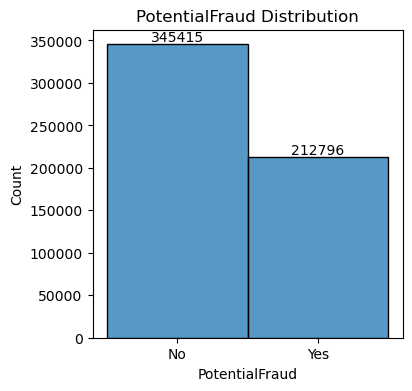

In [35]:
fig, axes = plt.subplots(figsize=(4, 4))
plot = sns.histplot(data=df, x='PotentialFraud', ax=axes)
axes.bar_label(plot.containers[0])
axes.set_title("PotentialFraud Distribution")
plt.show()

### Training Model

In [58]:
from sklearn.preprocessing import LabelEncoder
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm
import os

In [37]:
df['PotentialFraud'].replace({'No':0, 'Yes': 1}, inplace=True)

In [38]:
X = df.drop(columns=['PotentialFraud', 'Provider', 'ClaimID', 'BeneID'])
y = df['PotentialFraud']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [40]:
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'RenalDiseaseIndicator', 'Type'],
      dtype='object')

In [42]:
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

In [43]:
X_train_encoded.shape

(446568, 49)

In [44]:
def encode_column(col):
    """
    Encodes a single column using LabelEncoder and handles unseen labels.
    Returns the encoded train and test series and the fitted encoder.
    """
    le = LabelEncoder()
    le.fit(X_train[col])

    # Transform training data
    train_encoded = le.transform(X_train[col])
    
    # Transform testing data, handling unseen labels
    le_classes = list(le.classes_)
    
    # Map unseen labels to a new value (e.g., -1)
    mapping = {label: i for i, label in enumerate(le_classes)}
    test_encoded = X_test[col].map(mapping).fillna(-1).astype(int)

    # Return the encoder along with the encoded data
    return col, train_encoded, test_encoded, le


In [50]:
encoders = {}
with ThreadPoolExecutor(max_workers=os.cpu_count()) as executor:
    futures = {executor.submit(encode_column, col) for col in categorical_cols}
    
    for future in tqdm(futures, total=len(categorical_cols), desc="Encoding columns"):
        # The function now returns 4 values, so we need 4 variables
        col, train_encoded_series, test_encoded_series, le_fitted = future.result()
        
        # Update the encoded dataframes
        X_train_encoded[col] = train_encoded_series
        X_test_encoded[col] = test_encoded_series
        
        # Store the fitted encoder
        encoders[col] = le_fitted
        

print("\nEncoding complete. Encoded DataFrames are ready.")

Encoding columns: 100%|████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 37.25it/s]


Encoding complete. Encoded DataFrames are ready.


In [47]:
X_train_encoded.shape

(446568, 49)

In [51]:
encoders

{'ClmDiagnosisCode_7': LabelEncoder(),
 'RenalDiseaseIndicator': LabelEncoder(),
 'OtherPhysician': LabelEncoder(),
 'ClmDiagnosisCode_4': LabelEncoder(),
 'OperatingPhysician': LabelEncoder(),
 'ClmDiagnosisCode_6': LabelEncoder(),
 'ClmDiagnosisCode_10': LabelEncoder(),
 'Type': LabelEncoder(),
 'ClmDiagnosisCode_5': LabelEncoder(),
 'ClmDiagnosisCode_8': LabelEncoder(),
 'ClmDiagnosisCode_2': LabelEncoder(),
 'ClmDiagnosisCode_3': LabelEncoder(),
 'ClmAdmitDiagnosisCode': LabelEncoder(),
 'AttendingPhysician': LabelEncoder(),
 'ClmDiagnosisCode_1': LabelEncoder(),
 'ClmDiagnosisCode_9': LabelEncoder(),
 'DiagnosisGroupCode': LabelEncoder()}

In [55]:
unique_value_distribution(df)

Unique value count per column:

BeneID: 138556 unique values and Dtype: object
ClaimID: 558211 unique values and Dtype: object
Provider: 5410 unique values and Dtype: object
InscClaimAmtReimbursed: 438 unique values and Dtype: int64
AttendingPhysician: 82064 unique values and Dtype: object
OperatingPhysician: 35316 unique values and Dtype: object
OtherPhysician: 46458 unique values and Dtype: object
ClmAdmitDiagnosisCode: 4099 unique values and Dtype: object
DeductibleAmtPaid: 17 unique values and Dtype: float64
DiagnosisGroupCode: 736 unique values and Dtype: object
ClmDiagnosisCode_1: 10451 unique values and Dtype: object
ClmDiagnosisCode_2: 5301 unique values and Dtype: object
ClmDiagnosisCode_3: 4757 unique values and Dtype: object
ClmDiagnosisCode_4: 4360 unique values and Dtype: object
ClmDiagnosisCode_5: 3971 unique values and Dtype: object
ClmDiagnosisCode_6: 3608 unique values and Dtype: object
ClmDiagnosisCode_7: 3389 unique values and Dtype: object
ClmDiagnosisCode_8: 3071 u

In [60]:
scaler = StandardScaler()
numerical_cols = X_train_encoded.select_dtypes(include=np.number).columns.difference(categorical_cols)
# Fit on training data and transform both train and test sets
X_train_encoded[numerical_cols] = scaler.fit_transform(X_train_encoded[numerical_cols])
X_test_encoded[numerical_cols] = scaler.transform(X_test_encoded[numerical_cols])

In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

In [62]:
print("Training the RandomForestClassifier model...")
model.fit(X_train_encoded, y_train)
print("Training complete.")

# Make predictions on the encoded test data
print("Making predictions on the test set...")
y_pred = model.predict(X_test_encoded)
print("Predictions complete.")

Training the RandomForestClassifier model...
Training complete.
Making predictions on the test set...
Predictions complete.


In [63]:
print("\n--- Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Model Evaluation ---
Accuracy: 0.7771109697876266

Confusion Matrix:
[[63520  5563]
 [19321 23239]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84     69083
           1       0.81      0.55      0.65     42560

    accuracy                           0.78    111643
   macro avg       0.79      0.73      0.74    111643
weighted avg       0.78      0.78      0.77    111643

